# Ecommerce Text Classification
## _Introduction to NLP_ Final Project

## Problem Statement

Product categorization also referred to as product classification, is a field of study within natural language processing (NLP). It is also one of the biggest challenges for e-commerce companies. With the advancement of AI technology, researchers have been applying machine learning to product categorization problems.

Product categorization is the placement and organization of products into their respective categories. In that sense, it sounds simple: choose the correct department for a product. However, this process is complicated by the sheer volume of products on many e-commerce platforms. Furthermore, many products could belong to multiple categories.
There are many reasons why product categorization is important for e-commerce and marketing. Through the accurate classification of your products, you can increase conversion rates, strengthen your search engine, and improve your site’s Google ranking.

A well-built product taxonomy allows customers to find what they are looking for quickly and easily. Making your site easy to navigate is one of the most important elements of your UX and will lead to higher conversion rates.

Correctly categorizing products allows your search engine to fetch products quicker. As a result, you create a quicker and more accurate search engine. Once you have a strong product taxonomy in place, this will allow you to create the relevant landing pages for your products. In turn, Google and other search engines will be able to index your site and your products more easily. In the end, this allows your products to rank higher on search engines, increasing the chance that customers find your site.

To help merchants choose the correct category, Amazon and other e-commerce companies have automated product categorization tools available. After simply inputting the title or a few words about the product, the system can automatically choose the correct category for you.


The dataset has the following features:

Data Set Characteristics: Multivariate

Number of Instances: 50424

Number of classes: 4

Objective: To implement the techniques learned as a part of the course.

Learning Outcomes:
- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model

Best Practices for the Notebook :
The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.

## 1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)





In [1]:
# import libraries

# data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import wordcloud
import random

# text preprocessing
import string
import re
import itertools
from itertools import chain
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# download stop words and dictionary
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# ML & DL
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras import backend
from tensorflow.keras.utils import plot_model

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Model Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

# Save model
from joblib import dump

# other
import random
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load dataset

path = "/content/drive/MyDrive/Colab Notebooks/DL&AI (Great Learning UT)/Module 3: Intro to Natural Language Processing/Project: Ecommerce Product Classification/Data/ecommerceDataset.csv"
df = pd.read_csv(path)
df.head()

# path for VSCode to work locally
# path = "/Users/student/Desktop/Personal/UT - Great Learning/DL_AI/Project3_TextClassification/Data/ecommerceDataset.csv"

Label                                               Text
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2               Household  Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3  Clothing & Accessories  Proline Men's Track Jacket Proline Woven, 100%...
4               Household  Chef's Garage 2 Slot Edge Grip Kitchen Knife S...

In [4]:
# create an independent copy of original dataset
df_copy = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   50424 non-null  object
 1   Text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


## 2. Exploratory Data Analysis and Understanding of data-columns: (8 Marks)

### a. Print Shape of data.

In [6]:
df.shape

(50424, 2)

### b. Print data description and info about the data. Comment about the result.

In [7]:
df.describe()

Label                                               Text
count       50424                                              50423
unique          4                                              27801
top     Household  Think & Grow Rich About the Author NAPOLEON HI...
freq        19312                                                 30

#### Insights
- Dataset is relatively small sized for the task in hand, with 50 thousand observations.
- Both variables are objects, meaning we have texts in both.
- The most frequent product is Napoleon Hill's book "Think and Grow Rich".This tells us we can probably face duplicate values.
- We have a lot of duplicates, and probably a few missing values.

###  c. Check the data type of the Text column’s first value.


In [8]:
# check for value in first observation of Text column
type(df["Text"][0])

str

### d. Check for null values and remove the rows in which null values are present.


In [9]:
# are there any null values?
null_values = df.isnull().sum().sum()
print(f"There are {null_values} null values in our dataset.")

There are 1 null values in our dataset.


In [10]:
# drop null values
# inplace=True parameter makes the change permanent
df.dropna(inplace=True)

# double check
null_values = df.isnull().sum().sum()
print(f"There are {null_values} null values in our dataset.")

There are 0 null values in our dataset.


### e. Check for unique labels in the ‘Label’ column.
### f. Save the unique labels in the list named ‘labels’.

In [11]:
# set unique values of "Label" column in a variable named "unique_labels"
unique_labels = np.unique(df["Label"])

# count of unique values
print(f'We have {np.count_nonzero(unique_labels)} unique values in the "Label" column.')

# convert array to list, for data handling purposes
unique_labels_arr = unique_labels.tolist()

# create empty list named "labels"
# create a for loop to append unique values to "labels"
labels = []
for unique_label in unique_labels_arr:
    labels.append(unique_label)

# print unique values
print(f"These categories are {', '.join(labels)}.")

We have 4 unique values in the "Label" column.
These categories are Books, Clothing & Accessories, Electronics, Household.


### g. Print the first 5 rows of data.

In [12]:
df.head()

Label                                               Text
0               Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1               Household  Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2               Household  Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3  Clothing & Accessories  Proline Men's Track Jacket Proline Woven, 100%...
4               Household  Chef's Garage 2 Slot Edge Grip Kitchen Knife S...

### Additional Analysis

In [13]:
# duplicated values
df.duplicated().sum()

22622

In [14]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(27801, 2)

In [15]:
# show proportion for each category
print(round(df["Label"].value_counts(1)*100, 2))

Label
Household                 38.00
Books                     22.50
Clothing & Accessories    20.41
Electronics               19.09
Name: proportion, dtype: float64


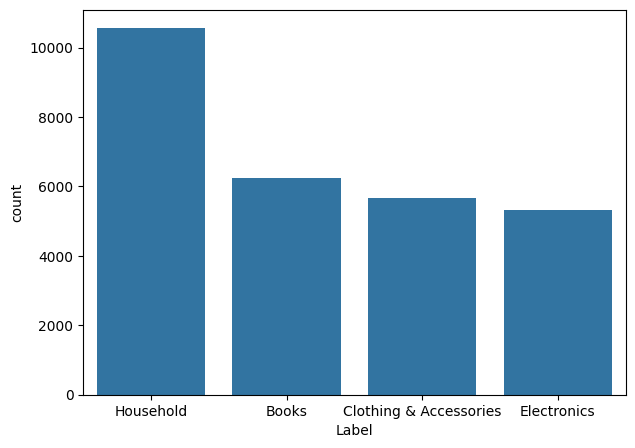

In [16]:
# create a countplot to show distribution of Label variable
plt.figure(figsize=(7,5))
graph = sns.countplot(data=df, x="Label",
              order=df["Label"].value_counts().index)
# show plot
plt.show()

In [17]:
# show average length of target variable, in characters

# for loop to append all lengths in an empty list
lenghts = []
for text in df["Text"]:
   lenghts.append(len(text))

# show sample
lenghts[0:5]

[815, 390, 214, 106, 1502]

In [18]:
# do average calculation manually for list
avg_len = round(sum(lenghts) / len(lenghts), 2)
print(f"The average length of the Text column is of {avg_len} characters.")

The average length of the Text column is of 699.97 characters.


## 3. Plot the word cloud graph of the text column description for each product('Household', 'Clothing &      Accessories', 'Electronics', 'Books') separately. (4 Marks)

In [19]:
# store the observations of each Label separately

household = df[df["Label"]=="Household"]
clothing = df[df["Label"]=="Clothing & Accessories"]
electronics = df[df["Label"]=="Electronics"]
books = df[df["Label"]=="Books"]

# double check

# put label in a list and do a for loop to show first 5 rows of each label
labels_dfs = [household, clothing, electronics, books]

for label in labels_dfs:
    print(label.head())
    print("-------------------------------------------------------------------------------")

       Label                                               Text
0  Household  Styleys Wrought Iron Coat Rack Hanger Creative...
1  Household  Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2  Household  Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
4  Household  Chef's Garage 2 Slot Edge Grip Kitchen Knife S...
5  Household  SYGA Electric Knife Sharpener, Multi-Functiona...
-------------------------------------------------------------------------------
                     Label                                               Text
3   Clothing & Accessories  Proline Men's Track Jacket Proline Woven, 100%...
25  Clothing & Accessories  Wrangler Men's Checkered Slim Fit Casual Shirt...
31  Clothing & Accessories  Cozami Casual Checkered Full Sleeves Shirts fo...
33  Clothing & Accessories                                     AREO Yoga Pant
34  Clothing & Accessories  Skudgear Jumbo Pack of 10 Cute Kids Baby Girls...
--------------------------------------------------------------------

In [20]:
# create a list with the words of the dataframe of each Label

# do a for loop for each Label, where we will store the words of each observation in an empty list
entire_list = []
for label_df in labels_dfs:
    temp_list = []
    for i in df["Text"]:
        temp_list.append(i.split())
    entire_list.append(temp_list)

In [21]:
# the `entire_list` variable is a list of lists of lists, it has 3 levels:
# 1st level - has one element for each df (4), a list of the words of each dataframe
# 2nd level - a list with each observation for a specific dataframe
# 3rd level - a list compiled with one observation

# get rid of list of lists by using  itertools

household_wordslist = list(itertools.chain.from_iterable(entire_list[0]))
clothing_wordslist = list(itertools.chain.from_iterable(entire_list[1]))
electronics_wordslist = list(itertools.chain.from_iterable(entire_list[2]))
books_wordslist = list(itertools.chain.from_iterable(entire_list[3]))

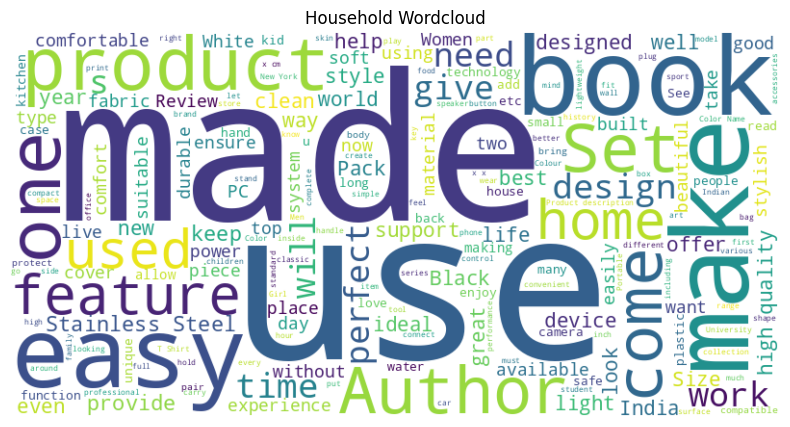

In [32]:
# cloud for housing

# join texts and define wordcloud
text = ' '.join(household_wordslist)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# display wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Household Wordcloud")
plt.show()

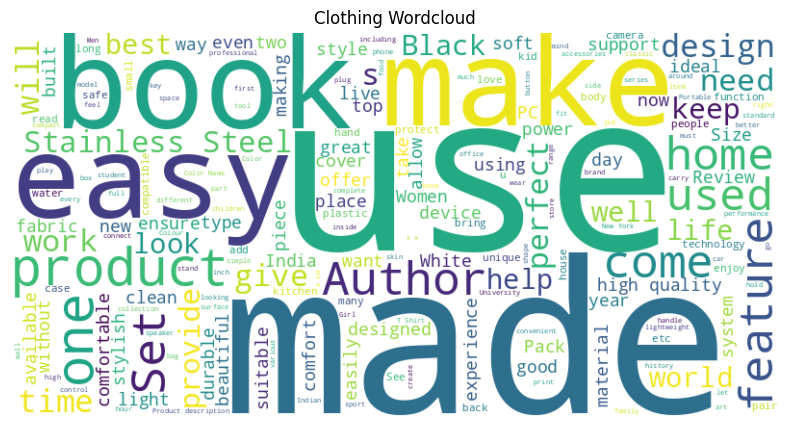

In [31]:
# cloud for clothing
# join texts and define wordcloud
text = ' '.join(clothing_wordslist)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# display wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Clothing Wordcloud")
plt.show()

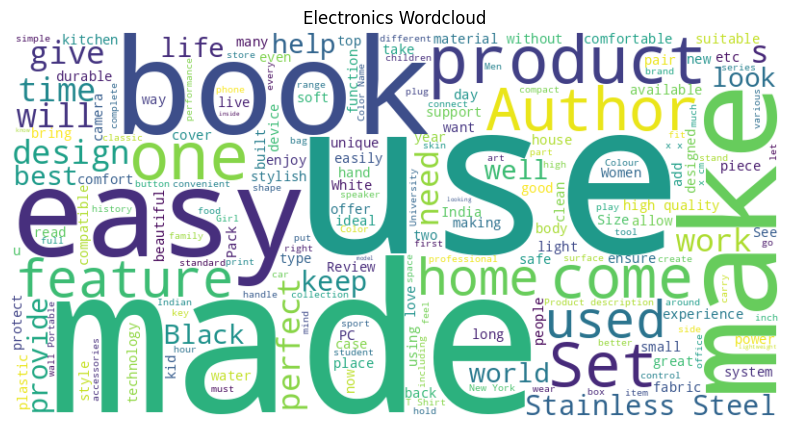

In [33]:
# cloud for electronics
# join texts and define wordcloud
text = ' '.join(electronics_wordslist)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# display wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Electronics Wordcloud")
plt.show()

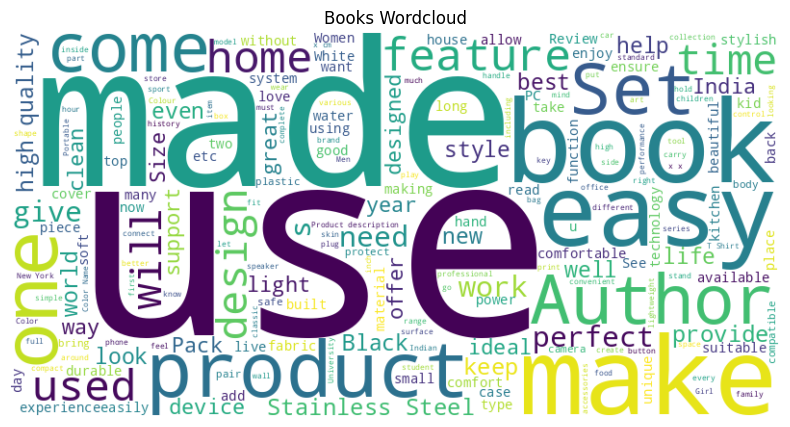

In [34]:
# cloud for books
# join texts and define wordcloud
text = ' '.join(books_wordslist)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# display wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Books Wordcloud")
plt.show()

## 4. Text pre-processing: Data preparation. (12 Marks)
### NOTE:- Each text pre-processing step should be mentioned in the notebook separately.


  ### f. Conversion to lowercase.

In [ ]:
# convert texts to lower head
df["Text"] = df["Text"].apply(str.lower)
df["Text"].head()

0    styleys wrought iron coat rack hanger creative...
1    cuisinart cco-50bkn deluxe electric can opener...
2    anchor penta 6 amp 1 -way switch (white) - pac...
3    proline men's track jacket proline woven, 100%...
4    chef's garage 2 slot edge grip kitchen knife s...
Name: Text, dtype: object

  ### a. Html tag removal.

In [ ]:
# define function to remove HTML tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

# remove HTML tags
for text in df["Text"]:
    strip_html_tags(text)

df["Text"].head()

0    styleys wrought iron coat rack hanger creative...
1    cuisinart cco-50bkn deluxe electric can opener...
2    anchor penta 6 amp 1 -way switch (white) - pac...
3    proline men's track jacket proline woven, 100%...
4    chef's garage 2 slot edge grip kitchen knife s...
Name: Text, dtype: object

### c-d. Remove Special Characters, Numbers and Punctuations.

In [ ]:
# replace items that are not found (with ^ symbol) in the alphabet (a-z) with a blank space
df["Text"] = df["Text"].str.replace(r"[^a-z]", " ", regex=True, flags=re.IGNORECASE)
df["Text"].head()

0    styleys wrought iron coat rack hanger creative...
1    cuisinart cco   bkn deluxe electric can opener...
2    anchor penta   amp    way switch  white    pac...
3    proline men s track jacket proline woven      ...
4    chef s garage   slot edge grip kitchen knife s...
Name: Text, dtype: object

### b. Tokenization.

In [ ]:
# tokenize all words (text) in each observation and turn it into a list, converting it into a list of lists
tokens = df["Text"].apply(lambda text: word_tokenize(text)).tolist()
print(tokens[0:5])

[['styleys', 'wrought', 'iron', 'coat', 'rack', 'hanger', 'creative', 'fashion', 'bedroom', 'for', 'hanging', 'clothes', 'shelves', 'wrought', 'iron', 'racks', 'standing', 'coat', 'rack', 'black', 'color', 'name', 'black', 'styleys', 'coat', 'stand', 'is', 'great', 'for', 'homes', 'and', 'rooms', 'with', 'limited', 'space', 'as', 'having', 'one', 'standing', 'rack', 'takes', 'up', 'less', 'space', 'compared', 'to', 'drawers', 'and', 'cupboards', 'easy', 'for', 'guests', 'to', 'keep', 'their', 'items', 'especially', 'bags', 'and', 'scarves', 'when', 'visiting', 'as', 'they', 'can', 'always', 'keep', 'an', 'eye', 'on', 'it', 'and', 'easily', 'grab', 'it', 'when', 'they', 're', 'leaving', 'makes', 'a', 'smart', 'd', 'cor', 'piece', 'for', 'your', 'home', 'or', 'room', 'as', 'occupied', 'stands', 'can', 'show', 'off', 'your', 'stylish', 'handbags', 'accessories', 'and', 'hangman', 'achievement', 'medals', 'dimensions', 'cm', 'x', 'cm', 'x', 'cm', 'weight', 'kg', 'material', 'steel', 'colou

  ### e. Removal of stopwords

In [ ]:
# define stopwords list
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# remove negative words, as they change meaning in sentence
# it is not the same "not good" as "good", for instance

# list of stopwords to remove (stopwords with negative meaning)
stopwords_to_remove = ["no", "not", "nor", "don", "don't", "ain", "aren", "aren't", "couldn", "couldn't", "didn", "didn't",
                       "doesn", "doesn't", "hadn", "hadn't", "hasn", "hasn't", "haven", "haven't", "isn", "isn't", "mightn",
                       "mightn't", "mustn", "mustn't", "needn", "needn't", "shan", "shan't", "shouldn", "shouldn't", "wasn",
                       "wasn't", "weren", "weren't", "won't", "wouldn", "wouldn't"]

# add stopword to list if it is not found in "stopwords_to_remove"
filtered_stopwords = [stopword for stopword in stopwords_list if stopword not in stopwords_to_remove]
print(filtered_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [ ]:
# keep token if it is not found in "stopwords_list", hence removing stopwords

filtered_tokens = []
for i in df["Text"].str.split():
  filtered_tokens.append([token for token in i if token not in filtered_stopwords])

# show sample
print(filtered_tokens[0:5])

[['styleys', 'wrought', 'iron', 'coat', 'rack', 'hanger', 'creative', 'fashion', 'bedroom', 'hanging', 'clothes', 'shelves', 'wrought', 'iron', 'racks', 'standing', 'coat', 'rack', 'black', 'color', 'name', 'black', 'styleys', 'coat', 'stand', 'great', 'homes', 'rooms', 'limited', 'space', 'one', 'standing', 'rack', 'takes', 'less', 'space', 'compared', 'drawers', 'cupboards', 'easy', 'guests', 'keep', 'items', 'especially', 'bags', 'scarves', 'visiting', 'always', 'keep', 'eye', 'easily', 'grab', 'leaving', 'makes', 'smart', 'cor', 'piece', 'home', 'room', 'occupied', 'stands', 'show', 'stylish', 'handbags', 'accessories', 'hangman', 'achievement', 'medals', 'dimensions', 'cm', 'x', 'cm', 'x', 'cm', 'weight', 'kg', 'material', 'steel', 'colour', 'white', 'black', 'pink', 'no', 'hook', 'straight', 'pegs', 'suitable', 'hang', 'coats', 'clothes', 'scarves', 'handbags', 'hats', 'accessories'], ['cuisinart', 'cco', 'bkn', 'deluxe', 'electric', 'opener', 'black', 'size', 'none', 'color', 'n

  ### g. Lemmatize or stemming.
  - The choosed technique to use will be lemmatization.
  - Even though it is more computationally expensive, it usually delivers better and more consistent and accurate results.
  - This happens because lemmatization takes the root of the word, while stemming cuts it.
  - We could try stemming too anyways, and compare the results of both techniques in a baseline model.

In [ ]:
# part of speech tagging
# for all tokens add a POS tag in form of a tuple
pos_tags = []
for list in filtered_tokens:
    pos_tags.append(nltk.pos_tag(list))

In [ ]:
# flatten "pos_tags" (list of lists), until we have a complete list of all elements

# the purpose of doing this is to have only one list with the whole items,
# so we will to be able to extract the unique POS values

flattened_list1 = [tag for sublist in pos_tags for tag in sublist]
flattened_list2 = [tag for sublist in flattened_list1 for tag in sublist]

for i, v in enumerate(flattened_list2[0:6]):
    print(i, v)

0 styleys
1 NNS
2 wrought
3 VBD
4 iron
5 NN


In [ ]:
# in our list, we can see that POS tags are indexed in odd numbers (1, 3, 5, etc…)
# to extract them, we will look for odd indexes by doing "i % 2", or numbers non divisible by 2

# make a list of odd indexes
odd_indexes = [i for i in range(len(flattened_list2)) if i % 2 != 0]

# extract odd indexed elements
elements_at_odd_indexes = [flattened_list2[i] for i in odd_indexes]

# extract unique elements in list
pos_tags_list = np.unique(elements_at_odd_indexes)

# show list
print(pos_tags_list)

['$' "''" 'CC' 'CD' 'DT' 'EX' 'FW' 'IN' 'JJ' 'JJR' 'JJS' 'LS' 'MD' 'NN'
 'NNP' 'NNPS' 'NNS' 'PDT' 'POS' 'PRP' 'PRP$' 'RB' 'RBR' 'RBS' 'RP' 'SYM'
 'TO' 'UH' 'VB' 'VBD' 'VBG' 'VBN' 'VBP' 'VBZ' 'WDT' 'WP' 'WP$' 'WRB']


In [ ]:
# there are items that are not tags, namely the dollar sign and white spaces
# they will be removed by keeping only alphabetical values, using the "is.alpha()" method

pos_tags_list_filtered = [tag for tag in pos_tags_list if tag.isalpha()]
print(pos_tags_list_filtered)

['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WRB']


In [ ]:
# instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

# empty list to store tokens
lemmatized_tokens = []

# iterate over each sublist (each observation)
# tag the part of speech for each token and append to "pos_tags" list
pos_tags = []
for sublist in filtered_tokens:
    pos_tags.append(nltk.pos_tag(sublist))

for sublist_pos_tags in pos_tags:
    lemmatized_sublist = []

    # check if the assigned is in the tags list. if it is not found there assign "None"
    for token, pos_tag in sublist_pos_tags:
        pos_tag = pos_tag[0] if pos_tag[0] in pos_tags_list_filtered else None

        # according to the tag, lemmatize each token and append the lemma to "lemmatized sublist"
        # append the sublist (observation) to the lemmatized_tokens to
        if pos_tag:
            lemma = lemmatizer.lemmatize(token, pos=pos_tag)
        else:
            lemma = lemmatizer.lemmatize(token)
        lemmatized_sublist.append(lemma)

    # form a list of lists of the lemmatized tokens
    lemmatized_tokens.append(lemmatized_sublist)

# print lemmas for first 5 observations
print(lemmatized_tokens[0:5])

[['styleys', 'wrought', 'iron', 'coat', 'rack', 'hanger', 'creative', 'fashion', 'bedroom', 'hanging', 'clothes', 'shelf', 'wrought', 'iron', 'rack', 'standing', 'coat', 'rack', 'black', 'color', 'name', 'black', 'styleys', 'coat', 'stand', 'great', 'home', 'room', 'limited', 'space', 'one', 'standing', 'rack', 'take', 'le', 'space', 'compared', 'drawer', 'cupboard', 'easy', 'guest', 'keep', 'item', 'especially', 'bag', 'scarf', 'visiting', 'always', 'keep', 'eye', 'easily', 'grab', 'leaving', 'make', 'smart', 'cor', 'piece', 'home', 'room', 'occupied', 'stand', 'show', 'stylish', 'handbag', 'accessory', 'hangman', 'achievement', 'medal', 'dimension', 'cm', 'x', 'cm', 'x', 'cm', 'weight', 'kg', 'material', 'steel', 'colour', 'white', 'black', 'pink', 'no', 'hook', 'straight', 'peg', 'suitable', 'hang', 'coat', 'clothes', 'scarf', 'handbag', 'hat', 'accessory'], ['cuisinart', 'cco', 'bkn', 'deluxe', 'electric', 'opener', 'black', 'size', 'none', 'color', 'name', 'black', 'style', 'conve

In [ ]:
# create a counter, for every token after lemmatization that is different from its previous version in variable "filtered_tokens", add 1.
# this will give us the total amount of tokens that were lemmatized

counter = 0
for i in range(len(filtered_tokens)):
    if lemmatized_tokens[i] == filtered_tokens[i]:
        counter += 1

perc_lemmatized_tokens = round((counter / len(lemmatized_tokens)) * 100, 2)
print(f"The percentage of lemmatized tokens is {perc_lemmatized_tokens}%")

The percentage of lemmatized tokens is 10.97%


  ### h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
  ### i. Print the first 5 rows of data after pre-processing.

In [ ]:
# create a column with preprocessed text
df["Preprocessed Text"] = lemmatized_tokens
df.head()

Label                                               Text  \
0               Household  styleys wrought iron coat rack hanger creative...   
1               Household  cuisinart cco   bkn deluxe electric can opener...   
2               Household  anchor penta   amp    way switch  white    pac...   
3  Clothing & Accessories  proline men s track jacket proline woven      ...   
4               Household  chef s garage   slot edge grip kitchen knife s...   

                                   Preprocessed Text  
0  [styleys, wrought, iron, coat, rack, hanger, c...  
1  [cuisinart, cco, bkn, deluxe, electric, opener...  
2  [anchor, penta, amp, way, switch, white, pack,...  
3  [proline, men, track, jacket, proline, woven, ...  
4  [chef, garage, slot, edge, grip, kitchen, knif...

In [ ]:
# remove list
# join all the tokens for every row
for i in range(len(df["Preprocessed Text"])):
  df["Preprocessed Text"].iloc[i] = " ".join(df["Preprocessed Text"].iloc[i])
  df.head()

In [ ]:
df.head()

Label                                               Text  \
0               Household  styleys wrought iron coat rack hanger creative...   
1               Household  cuisinart cco   bkn deluxe electric can opener...   
2               Household  anchor penta   amp    way switch  white    pac...   
3  Clothing & Accessories  proline men s track jacket proline woven      ...   
4               Household  chef s garage   slot edge grip kitchen knife s...   

                                   Preprocessed Text  
0  styleys wrought iron coat rack hanger creative...  
1  cuisinart cco bkn deluxe electric opener black...  
2  anchor penta amp way switch white pack anchor ...  
3  proline men track jacket proline woven polyest...  
4  chef garage slot edge grip kitchen knife sharp...

### Comparison
- Let us compare an observation of raw data against preprocessed data.

In [ ]:
# comparison of a random sample before and after preprocessing
random_number = random.randint(1, len(df))

print(df_copy["Text"][random_number])
print(df["Preprocessed Text"][random_number])

Apple MacBook Air Core i5 8th Gen 13.3 inch Laptop (8GB/128GB SSD/MacOS Mojave/Gold/1.25 kgs), MREE2HN/A Size name:128GB   Available in silver, space gray, and gold, the new thinner and lighter MacBook Air features a stunning Retina display, Touch ID, the latest Apple-designed keyboard, and a Force Touch trackpad—all housed in an iconic wedge design made from 100 percent recycled aluminum.2 And with all-day battery life, MacBook Air is your perfectly portable, do-it-all notebook.
apple macbook air core th gen inch laptop gb gb ssd macos mojave gold kg mree hn size name gb available silver space gray gold new thinner lighter macbook air feature stunning retina display touch id latest apple designed keyboard force touch trackpad housed iconic wedge design made percent recycled aluminum day battery life macbook air perfectly portable notebook


## 5. Vectorization: (8 Marks)

### a. Use CountVectorizer.


In [ ]:
# instantiate CountVectorizer
count_vectorizer = CountVectorizer()
print(count_vectorizer)

CountVectorizer()


In [ ]:
# convert preprocessed text to list to fit countvectorizer
preprocessed_text_list = df["Preprocessed Text"].tolist()
preprocessed_text_list[0:5]

['styleys wrought iron coat rack hanger creative fashion bedroom hanging clothes shelf wrought iron rack standing coat rack black color name black styleys coat stand great home room limited space one standing rack take le space compared drawer cupboard easy guest keep item especially bag scarf visiting always keep eye easily grab leaving make smart cor piece home room occupied stand show stylish handbag accessory hangman achievement medal dimension cm x cm x cm weight kg material steel colour white black pink no hook straight peg suitable hang coat clothes scarf handbag hat accessory',
 'cuisinart cco bkn deluxe electric opener black size none color name black style convenience power come together cuisinart electric open chrome accent elegant contour fit nicely modern countertop appliance easy single touc',
 'anchor penta amp way switch white pack anchor penta amp way switch white pack come spark shield concealed terminal silver cadmium contact ip protection captive screw',
 'proline m

In [ ]:
# fit CountVectorizer to preprocessed text
# each number represents the index number of each word, in aplhabetical order
count_vectorizer.fit(preprocessed_text_list)
print(count_vectorizer.vocabulary_)

{'styleys': 49998, 'wrought': 57749, 'iron': 26299, 'coat': 9614, 'rack': 41720, 'hanger': 22437, 'creative': 11518, 'fashion': 18102, 'bedroom': 4587, 'hanging': 22439, 'clothes': 9447, 'shelf': 46589, 'standing': 49162, 'black': 5442, 'color': 9857, 'name': 34504, 'stand': 49142, 'great': 21649, 'home': 23585, 'room': 44230, 'limited': 29800, 'space': 48418, 'one': 36460, 'take': 51148, 'le': 29178, 'compared': 10129, 'drawer': 14893, 'cupboard': 11918, 'easy': 15534, 'guest': 21957, 'keep': 27766, 'item': 26482, 'especially': 17013, 'bag': 3896, 'scarf': 45402, 'visiting': 55914, 'always': 1576, 'eye': 17765, 'easily': 15516, 'grab': 21471, 'leaving': 29246, 'make': 31016, 'smart': 47761, 'cor': 11030, 'piece': 38896, 'occupied': 36101, 'show': 46847, 'stylish': 50003, 'handbag': 22332, 'accessory': 321, 'hangman': 22441, 'achievement': 426, 'medal': 32012, 'dimension': 13906, 'cm': 9504, 'weight': 56770, 'kg': 27918, 'material': 31629, 'steel': 49334, 'colour': 9897, 'white': 57000

In [ ]:
# vectorize texts
cv_vector = count_vectorizer.transform(preprocessed_text_list)
type(cv_vector)

scipy.sparse._csr.csr_matrix

In [ ]:
# print shape of vector
cv_vector_shape = cv_vector.shape
print(f"We have {cv_vector_shape[0]} rows and {cv_vector_shape[1]} columns, which is the size of our bag of words")

We have 27801 rows and 58682 columns, which is the size of our 


In [ ]:
# number of times each word appears in the text
# not visible because it is a sparse matrix, with a huge amount of 0's
print(cv_vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### b. Use TfidfVectorizer.

In [ ]:
# instantiate vectorizer
tfidf_vectorizer = TfidfVectorizer()
print(tfidf_vectorizer)

TfidfVectorizer()


In [ ]:
# fit preprocessed data on vectorizer
# fit method computes TF and IDF
tfidf_vectorizer.fit(preprocessed_text_list)

TfidfVectorizer()

In [ ]:
# show vocabulary list
print(tfidf_vectorizer.vocabulary_)

{'styleys': 49998, 'wrought': 57749, 'iron': 26299, 'coat': 9614, 'rack': 41720, 'hanger': 22437, 'creative': 11518, 'fashion': 18102, 'bedroom': 4587, 'hanging': 22439, 'clothes': 9447, 'shelf': 46589, 'standing': 49162, 'black': 5442, 'color': 9857, 'name': 34504, 'stand': 49142, 'great': 21649, 'home': 23585, 'room': 44230, 'limited': 29800, 'space': 48418, 'one': 36460, 'take': 51148, 'le': 29178, 'compared': 10129, 'drawer': 14893, 'cupboard': 11918, 'easy': 15534, 'guest': 21957, 'keep': 27766, 'item': 26482, 'especially': 17013, 'bag': 3896, 'scarf': 45402, 'visiting': 55914, 'always': 1576, 'eye': 17765, 'easily': 15516, 'grab': 21471, 'leaving': 29246, 'make': 31016, 'smart': 47761, 'cor': 11030, 'piece': 38896, 'occupied': 36101, 'show': 46847, 'stylish': 50003, 'handbag': 22332, 'accessory': 321, 'hangman': 22441, 'achievement': 426, 'medal': 32012, 'dimension': 13906, 'cm': 9504, 'weight': 56770, 'kg': 27918, 'material': 31629, 'steel': 49334, 'colour': 9897, 'white': 57000

In [ ]:
# show sample of IDF values
print(tfidf_vectorizer.idf_[0:10])

[ 6.1452669   6.76695512 10.13425095 10.53971606  7.62194533 10.53971606
 10.13425095 10.13425095 10.53971606 10.13425095]


In [ ]:
# # code to apply TF-IDF to new document
# tfidf_vectorizer.transform(document)

## 6. Fit, tune(optimize the parameter to improve the accuracy)& evaluate the model using both types of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization. (14 Marks)


### Random Seed

In [ ]:
# set random seed, to ensure reproducibility
random_seed = 42
np.random.seed(random_seed)

### Label Encoder

In [ ]:
# instantiate Label Encoder
label_encoder = LabelEncoder()

# define labels
labels = df["Label"]

# fit and transform labels into encoder
encoded_labels = label_encoder.fit_transform(labels)

# show sample
print(np.unique(labels))
print(np.unique(encoded_labels))

['Books' 'Clothing & Accessories' 'Electronics' 'Household']
[0 1 2 3]


### Train Test Split

In [ ]:
# show percentages for each class
print(round(df["Label"].value_counts(1)*100, 2))

Label
Household                 38.00
Books                     22.50
Clothing & Accessories    20.41
Electronics               19.09
Name: proportion, dtype: float64


In [ ]:
# define X (texts) and Y (encoded labels)
X = tfidf_vectorizer.fit_transform(preprocessed_text_list)
y = np.array(encoded_labels)

# Data Split:
# Train = 60% (0.75*.8)
# Validation = 20% (0.25 * 0.8)
# Test = 20%
# stratify: balance class distribution and avoid bias
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=random_seed)

### Modeling
- Random Forest
- Neural Network
- …

#### Random Forest
- Let us begin with a baseline Random Forest model.

In [ ]:
# instantiate and fit Random Forest baseline model on training data
rf = RandomForestClassifier(n_jobs=-1, random_state=random_seed)
rf = rf.fit(X_train, y_train)

# make predictions on validation data
y_pred = rf.predict(X_val)

In [ ]:
# classification report for validation data
report = classification_report(y_val, y_pred)

print("Classification Report for Random Forest Model on Validation Data:")
print(report)

Classification Report for Random Forest Model on Validation Data:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1281
           1       0.95      0.96      0.95      1101
           2       0.94      0.84      0.89      1102
           3       0.90      0.95      0.92      2076

    accuracy                           0.93      5560
   macro avg       0.93      0.92      0.93      5560
weighted avg       0.93      0.93      0.92      5560



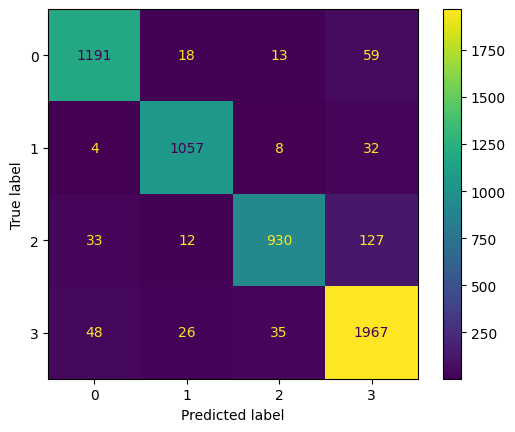

In [ ]:
# confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = rf.classes_)
disp.plot()
plt.show()

In [ ]:
# perform 10-fold cross-validation
cv_scores = cross_val_score(rf, X_val, y_val, cv=10)

# print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("")
# calculate mean and standard deviation of cross-validation scores
cv_avg_rf = round(cv_scores.mean(), 4) * 100
cv_std_rf = round(cv_scores.std(), 4)

print("Mean CV score:", cv_avg_rf)
print("Standard deviation of CV scores:", cv_std_rf)

Cross-validation scores: [0.90647482 0.88848921 0.91007194 0.88669065 0.89928058 0.89388489
 0.89748201 0.92805755 0.9028777  0.88489209]

Mean CV score: 89.98
Standard deviation of CV scores: 0.0123


##### Insights on Random Forest Model
- Precision: 93%
- Recall: 93%
- F1 Score: 92%
- Cross Validation Average: 89.98%
- Cross Validation Standard Deviation: 0.0123

###### Conclusion
- We have a very strong model here. The model has scores of 92 and above for the classification report, a very high cross validation average and an incredibly small cross validation standard deviation among the folds.
- This tells us our model is stable, robust, consistent and generalizes well on unseen data: all the characteristics we want on a machine learning model.


###### What is Next?
- We will train the exact same model on the dataset vectorized made with _CountVectorizer_, to compare results and see which technique works best.

#### Random Forest with _CountVectorizer_ dataset

In [ ]:
# define X (texts) and Y (encoded labels)
# "cv" = CountVectorizer. Do not confuse for "Cross Validation"
X_cv = count_vectorizer.fit_transform(preprocessed_text_list)
y_cv = np.array(encoded_labels)

# Create new dataset to leave untouched original training data

# Train = 60% (0.75*.8)
# Validation = 20% (0.25 * 0.8)
# Test = 20%
# stratify: balance class distribution and avoid bias
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.2, random_state=random_seed, stratify=y)
X_train_cv, X_val_cv, y_train_cv, y_val_cv = train_test_split(X_train_cv, y_train_cv, test_size=0.25, random_state=random_seed)

In [ ]:
# instantiate and fit Random Forest baseline model on training data
rf_cv = RandomForestClassifier(n_jobs=-1, random_state=random_seed)
rf_cv = rf_cv.fit(X_train_cv, y_train_cv)

# make predictions on validation data
y_pred_cv = rf_cv.predict(X_val_cv)

In [ ]:
# classification report for validation data
report = classification_report(y_val_cv, y_pred_cv)

print("Classification Report for Random Forest Model on Validation Data:")
print(report)

Classification Report for Random Forest Model on Validation Data:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1281
           1       0.95      0.96      0.96      1101
           2       0.94      0.84      0.89      1102
           3       0.90      0.94      0.92      2076

    accuracy                           0.92      5560
   macro avg       0.93      0.92      0.92      5560
weighted avg       0.92      0.92      0.92      5560



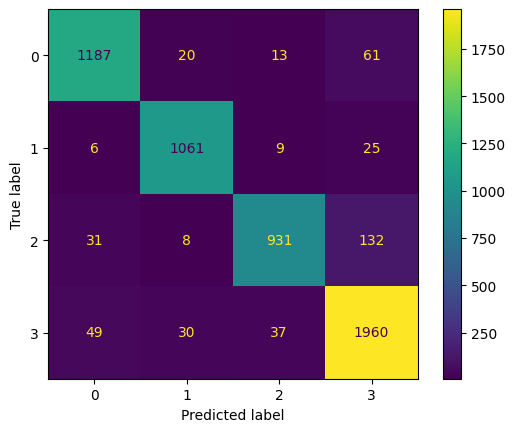

In [ ]:
# confusion matrix
cm = confusion_matrix(y_val_cv, y_pred_cv, labels=rf_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = rf_cv.classes_)
disp.plot()
plt.show()

In [ ]:
# perform 10-fold cross-validation
cv_scores_cv = cross_val_score(rf_cv, X_val_cv, y_val_cv, cv=10)

# print cross-validation scores
print("Cross-validation scores:", cv_scores_cv)
print("")
# calculate mean and standard deviation of cross-validation scores
cv_avg_cv = round(cv_scores_cv.mean(), 4) * 100
cv_std_cv = round(cv_scores_cv.std(), 4)

print("Mean CV score:", cv_avg_cv)
print("Standard deviation of CV scores:", cv_std_cv)

Cross-validation scores: [0.9028777  0.90107914 0.91546763 0.89748201 0.9028777  0.89568345
 0.89568345 0.92805755 0.9118705  0.88129496]

Mean CV score: 90.32
Standard deviation of CV scores: 0.0121


##### Insights on Random Forest Model
- Precision: 92%
- Recall: 92%
- F1 Score: 92%
- Cross Validation Average: 90.32%
- Cross Validation Standard Deviation: 0.0121

###### Conclusion
- **Model Comparison**

Models are quite similar. TF-IDF scored 1% higher in precision and recall while both scored the same in F1 Score. The average cross validation score for CountVectorizer is a bit higher, 0.34% to be exact, while its standard deviation is lower by 0.0002.

- **Model Choice**

Between the two trained Random Forests, the one with TF-IDF vectorizer will be chosen for subsequent analysis. Even though both models performed in a practically identical manner, it is more of a personal preference than a choice influenced by the metrics, as they are quite similar. I trust more the TF-IDF vectorizer given that it is a more precise metric than CountVectorizer, as it counts the weights and importance of the words rather than ocurrences.

I would also like to add that, at least in this exercise, there is no significant difference in model results between TF-IDF and CountVectorizer. The choicem in my opinion, should be based in personal preference and available computational resources, as long as they produce the same results.

###### What is Next?
- We will proceed now with the vectors trained with the _____, as it scored higher on the analyzed metrics. We will now train an Artificial Neural Network and compare the results to our Random Forest model.

#### Neural Network
- We will now proceed with a baseline Neural Network and compare results to the Random Forest.

##### Neural Network Preprocessing

In [ ]:
# set tensorflow random seed
tf.random.set_seed(random_seed)

In [ ]:
# TRAIN DATASET

# convert to coordinate format
# each value is represented by row index, column index and value
X_train_coo = X_train.tocoo()

# create tensorflow sparse tensor from COO
indices = np.column_stack((X_train_coo.row, X_train_coo.col))
sparse_tensor = tf.sparse.SparseTensor(indices, X_train_coo.data, X_train_coo.shape)

# sort indices by reordering sparse tensor
sparse_tensor = tf.sparse.reorder(sparse_tensor)

# create a TensorFlow dataset from the sparse tensor and labels
train_dataset = tf.data.Dataset.from_tensor_slices((sparse_tensor, y_train))

# shuffle and batch dataset in order to introduce randomness and reduce bias and overfitting
train_shuffle = train_dataset.shuffle(buffer_size=np.prod(train_dataset.element_spec[0].shape))
train_batch = train_shuffle.batch(batch_size=8)


In [ ]:
# VALIDATION DATASET

# convert to coordinate format
# each value is represented by row index, column index and value
X_val_coo = X_val.tocoo()

# create tensorflow sparse tensor from COO
indices = np.column_stack((X_val_coo.row, X_val_coo.col))
sparse_tensor = tf.sparse.SparseTensor(indices, X_val_coo.data, X_val_coo.shape)

# sort indices by reordering sparse tensor
sparse_tensor = tf.sparse.reorder(sparse_tensor)

# create a TensorFlow dataset from the sparse tensor and labels
val_dataset = tf.data.Dataset.from_tensor_slices((sparse_tensor, y_val))

# shuffle and batch dataset in order to introduce randomness and reduce bias and overfitting
val_shuffle = val_dataset.shuffle(buffer_size=np.prod(val_dataset.element_spec[0].shape))
val_batch = val_shuffle.batch(batch_size=8)

In [ ]:
# TEST DATASET

# convert to coordinate format
# each value is represented by row index, column index and value
X_test_coo = X_test.tocoo()

# create tensorflow sparse tensor from COO
indices = np.column_stack((X_test_coo.row, X_test_coo.col))
sparse_tensor = tf.sparse.SparseTensor(indices, X_test_coo.data, X_test_coo.shape)

# sort indices by reordering sparse tensor
sparse_tensor = tf.sparse.reorder(sparse_tensor)

# create a TensorFlow dataset from the sparse tensor and labels
test_dataset = tf.data.Dataset.from_tensor_slices((sparse_tensor, y_test))

# shuffle and batch dataset in order to introduce randomness and reduce bias and overfitting
test_shuffle = test_dataset.shuffle(buffer_size=np.prod(test_dataset.element_spec[0].shape))
test_batch = val_shuffle.batch(batch_size=8)

##### Baseline NN

In [ ]:
# instantiate baseline model
baseline = Sequential([
    Dense(32, activation="relu", input_shape=X_train.shape[1:]),
    Dense(len(np.unique(y_train)), activation="softmax")
])

In [ ]:
# compile model
baseline.compile(optimizer=Adam(0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

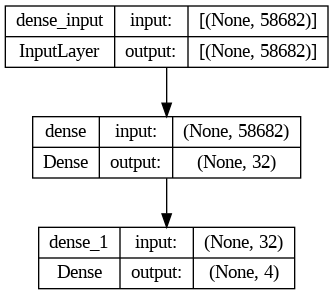

In [ ]:
tf.keras.utils.plot_model(baseline, show_shapes=True)

In [ ]:
# fit model
baseline_history = baseline.fit(train_batch, epochs=10, validation_data=val_batch)

Epoch 1/10
2085/2085 [==============================] - 58s 27ms/step - loss: 0.3411 - sparse_categorical_accuracy: 0.9119 - val_loss: 0.1907 - val_sparse_categorical_accuracy: 0.9511
Epoch 2/10
2085/2085 [==============================] - 55s 26ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.1800 - val_sparse_categorical_accuracy: 0.9491
Epoch 3/10
2085/2085 [==============================] - 55s 27ms/step - loss: 0.0342 - sparse_categorical_accuracy: 0.9909 - val_loss: 0.1846 - val_sparse_categorical_accuracy: 0.9498
Epoch 4/10
2085/2085 [==============================] - 55s 27ms/step - loss: 0.0170 - sparse_categorical_accuracy: 0.9954 - val_loss: 0.2005 - val_sparse_categorical_accuracy: 0.9491
Epoch 5/10
2085/2085 [==============================] - 52s 25ms/step - loss: 0.0116 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.2145 - val_sparse_categorical_accuracy: 0.9489
Epoch 6/10
2085/2085 [==============================] - 56s 27ms/step - loss: 0.

In [ ]:
# create plot with training and validation loss through epochs
from plotly import graph_objects as go
fig = go.Figure(data=[
    go.Scatter(y=baseline_history.history["loss"],
               name="Training Loss",
               mode="lines"),
    go.Scatter(y=baseline_history.history["val_loss"],
               name="Validation Loss",
               mode="lines")
])

fig.update_layout(title="Baseline Model: Train and Val Loss",
                  xaxis_title="Epochs",
                  yaxis_title="Sparse Categorical Cross Entropy")

fig.show()

695/695 [==============================] - 1s 2ms/step


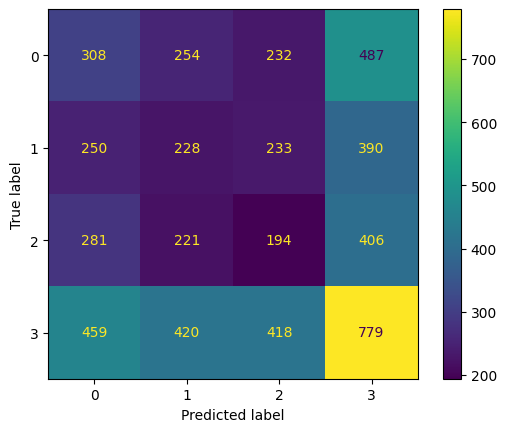

In [ ]:
# make predictions which are probabilities, take the highest value for each prediction
y_pred_baseline = baseline.predict(val_batch)
pred_classes_baseline = np.argmax(y_pred_baseline, axis=1)

# confusion matrix with predictions
cm = confusion_matrix(y_val, pred_classes_baseline, labels = np.unique(encoded_labels))
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = np.unique(encoded_labels))
disp.plot()
plt.show()

In [ ]:
# classification report for validation data
report = classification_report(y_val, pred_classes_baseline)

print("Classification Report for Baseline NN Model on Validation Data:")
print(report)

Classification Report for Baseline NN Model on Validation Data:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24      1281
           1       0.20      0.21      0.21      1101
           2       0.18      0.18      0.18      1102
           3       0.38      0.38      0.38      2076

    accuracy                           0.27      5560
   macro avg       0.25      0.25      0.25      5560
weighted avg       0.27      0.27      0.27      5560



##### Model 1

In [102]:
# instantiate model 1
model1 = Sequential([
    Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    Dense(32, activation="relu"),
    Dense(len(np.unique(y_train)), activation="softmax")
])

In [103]:
# compile model
model1.compile(optimizer=Adam(0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

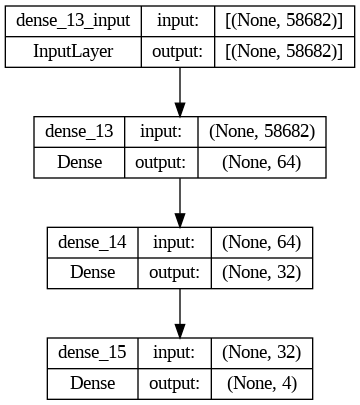

In [104]:
tf.keras.utils.plot_model(model1, show_shapes=True)

In [105]:
# fit model
history1 = model1.fit(train_batch, epochs=10, validation_data=val_batch)

Epoch 1/10
2085/2085 [==============================] - 109s 51ms/step - loss: 0.2592 - sparse_categorical_accuracy: 0.9231 - val_loss: 0.1781 - val_sparse_categorical_accuracy: 0.9498
Epoch 2/10
2085/2085 [==============================] - 124s 60ms/step - loss: 0.0485 - sparse_categorical_accuracy: 0.9866 - val_loss: 0.2099 - val_sparse_categorical_accuracy: 0.9414
Epoch 3/10
2085/2085 [==============================] - 128s 62ms/step - loss: 0.0164 - sparse_categorical_accuracy: 0.9949 - val_loss: 0.2334 - val_sparse_categorical_accuracy: 0.9484
Epoch 4/10
2085/2085 [==============================] - 116s 56ms/step - loss: 0.0127 - sparse_categorical_accuracy: 0.9957 - val_loss: 0.2424 - val_sparse_categorical_accuracy: 0.9484
Epoch 5/10
2085/2085 [==============================] - 120s 57ms/step - loss: 0.0090 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.2632 - val_sparse_categorical_accuracy: 0.9477
Epoch 6/10
2085/2085 [==============================] - 123s 59ms/step - lo

In [106]:
# create plot with training and validation loss through epochs
from plotly import graph_objects as go
fig = go.Figure(data=[
    go.Scatter(y=history1.history["loss"],
               name="Training Loss",
               mode="lines"),
    go.Scatter(y=history1.history["val_loss"],
               name="Validation Loss",
               mode="lines")
])

fig.update_layout(title="Model 1: Train and Val Loss",
                  xaxis_title="Epochs",
                  yaxis_title="Sparse Categorical Cross Entropy")

fig.show()

695/695 [==============================] - 1s 2ms/step


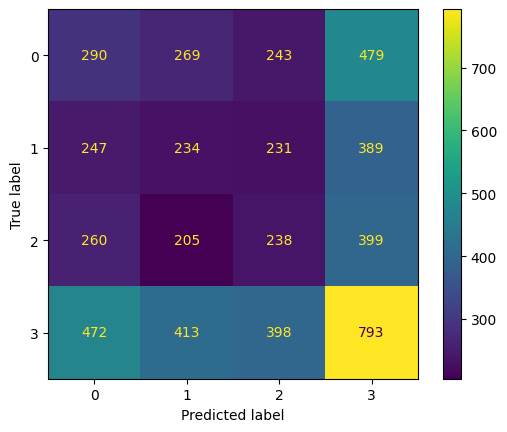

In [107]:
# make predictions which are probabilities, take the highest value for each prediction
y_pred_model1 = model1.predict(val_batch)
pred_classes_model1 = np.argmax(y_pred_model1, axis=1)

# confusion matrix with predictions
cm = confusion_matrix(y_val, pred_classes_model1, labels = np.unique(encoded_labels))
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = np.unique(encoded_labels))
disp.plot()
plt.show()

In [108]:
# classification report for validation data
report = classification_report(y_val, pred_classes_model1)

print("Classification Report for NN Model 1 on Validation Data:")
print(report)

Classification Report for NN Model 1 on Validation Data:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23      1281
           1       0.21      0.21      0.21      1101
           2       0.21      0.22      0.22      1102
           3       0.38      0.38      0.38      2076

    accuracy                           0.28      5560
   macro avg       0.26      0.26      0.26      5560
weighted avg       0.28      0.28      0.28      5560



In [109]:
# # perform 10-fold cross-validation
# cv_scores = cross_val_score(model1, X_val, y_val, cv=10)

# # print cross-validation scores
# print("Cross-validation scores:", cv_scores)
# print("")
# # calculate mean and standard deviation of cross-validation scores
# cv_avg_model1 = round(cv_scores.mean(), 4) * 100
# cv_std_model1 = round(cv_scores.std(), 4)

# print("Mean CV score:", cv_avg_model1)
# print("Standard deviation of CV scores:", cv_std_model1)

##### Model 2

In [110]:
# instantiate model 2
model2 = Sequential([
    Dense(128, activation="relu", input_shape=X_train.shape[1:]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(len(np.unique(y_train)), activation="softmax")
])

In [111]:
# compile model
model2.compile(optimizer=Adam(0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

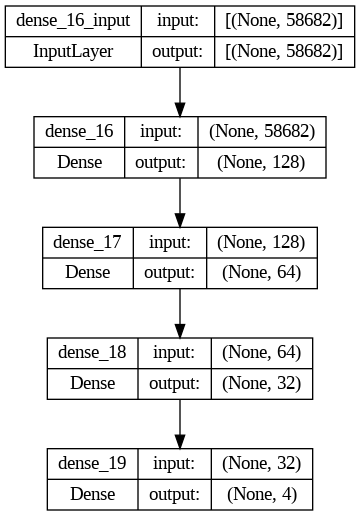

In [112]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [113]:
# fit model
history2 = model2.fit(train_batch, epochs=5, validation_data=val_batch)

Epoch 1/5
2085/2085 [==============================] - 209s 100ms/step - loss: 0.2439 - sparse_categorical_accuracy: 0.9266 - val_loss: 0.1807 - val_sparse_categorical_accuracy: 0.9486
Epoch 2/5
2085/2085 [==============================] - 232s 111ms/step - loss: 0.0464 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.2080 - val_sparse_categorical_accuracy: 0.9487
Epoch 3/5
2085/2085 [==============================] - 210s 101ms/step - loss: 0.0161 - sparse_categorical_accuracy: 0.9948 - val_loss: 0.3322 - val_sparse_categorical_accuracy: 0.9392
Epoch 4/5
2085/2085 [==============================] - 218s 104ms/step - loss: 0.0116 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.3233 - val_sparse_categorical_accuracy: 0.9448
Epoch 5/5
2085/2085 [==============================] - 246s 118ms/step - loss: 0.0085 - sparse_categorical_accuracy: 0.9968 - val_loss: 0.3189 - val_sparse_categorical_accuracy: 0.9448


In [114]:
# create plot with training and validation loss through epochs
from plotly import graph_objects as go
fig = go.Figure(data=[
    go.Scatter(y=history2.history["loss"],
               name="Training Loss",
               mode="lines"),
    go.Scatter(y=history2.history["val_loss"],
               name="Validation Loss",
               mode="lines")
])

fig.update_layout(title="Model 2: Train and Val Loss",
                  xaxis_title="Epochs",
                  yaxis_title="Sparse Categorical Cross Entropy")

fig.show()

695/695 [==============================] - 4s 5ms/step


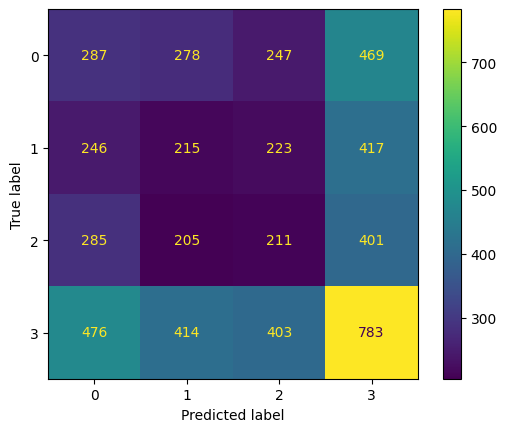

In [115]:
# Make predictions
# Assuming your model outputs probabilities
y_pred_model2 = model2.predict(val_batch)

# Assuming your model outputs class labels
pred_classes_model2 = np.argmax(y_pred_model2, axis=1)

# confusion matrix
cm = confusion_matrix(y_val, pred_classes_model2, labels = np.unique(encoded_labels))
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = np.unique(encoded_labels))
disp.plot()
plt.show()

In [116]:
# classification report for validation data
report = classification_report(y_val, pred_classes_model2)

print("Classification Report for NN Model Model 2 on Validation Data:")
print(report)

Classification Report for NN Model Model 2 on Validation Data:
              precision    recall  f1-score   support

           0       0.22      0.22      0.22      1281
           1       0.19      0.20      0.19      1101
           2       0.19      0.19      0.19      1102
           3       0.38      0.38      0.38      2076

    accuracy                           0.27      5560
   macro avg       0.25      0.25      0.25      5560
weighted avg       0.27      0.27      0.27      5560



##### Model 3

In [118]:
# instantiate model 3
model3 = Sequential([
    Dense(128, activation="relu", input_shape=X_train.shape[1:]),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    Dense(64, activation="relu"),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    Dense(32, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    Dense(len(np.unique(y_train)), activation="softmax")
])

In [119]:
# compile model
model3.compile(optimizer=Adam(0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

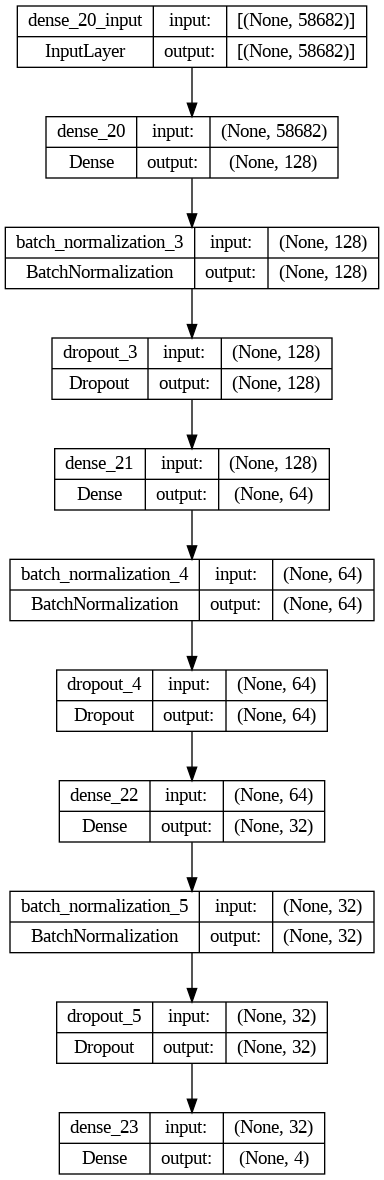

In [120]:
tf.keras.utils.plot_model(model3, show_shapes=True)

In [121]:
# fit model
history3 = model3.fit(train_batch, epochs=3, validation_data=val_batch)

Epoch 1/3
2085/2085 [==============================] - 281s 134ms/step - loss: 0.5020 - sparse_categorical_accuracy: 0.8312 - val_loss: 0.2281 - val_sparse_categorical_accuracy: 0.9397
Epoch 2/3
2085/2085 [==============================] - 264s 127ms/step - loss: 0.2582 - sparse_categorical_accuracy: 0.9192 - val_loss: 0.2069 - val_sparse_categorical_accuracy: 0.9464
Epoch 3/3
2085/2085 [==============================] - 257s 123ms/step - loss: 0.1934 - sparse_categorical_accuracy: 0.9387 - val_loss: 0.2135 - val_sparse_categorical_accuracy: 0.9457


In [122]:
# create plot with training and validation loss through epochs
from plotly import graph_objects as go
fig = go.Figure(data=[
    go.Scatter(y=history3.history["loss"],
               name="Training Loss",
               mode="lines"),
    go.Scatter(y=history3.history["val_loss"],
               name="Validation Loss",
               mode="lines")
])

fig.update_layout(title="Train and Val Loss",
                  xaxis_title="Epochs",
                  yaxis_title="Sparse Categorical Cross Entropy")

fig.show()

695/695 [==============================] - 2s 3ms/step


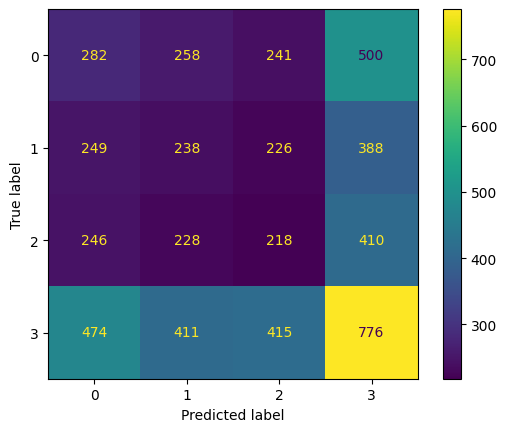

In [123]:
# make predictions which are probabilities, take the highest value for each prediction
y_pred_model3 = model3.predict(val_batch)
pred_classes_model3 = np.argmax(y_pred_model3, axis=1)

# confusion matrix with predictions
cm = confusion_matrix(y_val, pred_classes_model3, labels = np.unique(encoded_labels))
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = np.unique(encoded_labels))
disp.plot()
plt.show()

In [124]:
# classification report for validation data
report = classification_report(y_val, pred_classes_model3)

print("Classification Report for NN Model Model 3on Validation Data:")
print(report)

Classification Report for NN Model Model 3on Validation Data:
              precision    recall  f1-score   support

           0       0.23      0.22      0.22      1281
           1       0.21      0.22      0.21      1101
           2       0.20      0.20      0.20      1102
           3       0.37      0.37      0.37      2076

    accuracy                           0.27      5560
   macro avg       0.25      0.25      0.25      5560
weighted avg       0.27      0.27      0.27      5560



##### Model Comparison

In [126]:
# create graph comparing Train losses for all models
fig = go.Figure(data=[
    go.Scatter(y=baseline_history.history["loss"],
               name="Baseline Training Loss",
               mode="lines"),
    go.Scatter(y=history1.history["loss"],
               name="Model 1 Training Loss",
               mode="lines"),
    go.Scatter(y=history2.history["loss"],
               name="Model 2 Training Loss",
               mode="lines"),
    go.Scatter(y=history3.history["loss"],
               name="Model 3 Training Loss",
               mode="lines")
])

fig.update_layout(title="Train Loss Comparison",
                  xaxis_title="Epochs",
                  yaxis_title="Sparse Categorical Cross Entropy")

fig.show()

In [127]:
# create graph comparing Validation losses for all models
fig = go.Figure(data=[
    go.Scatter(y=baseline_history.history["val_loss"],
               name="Baseline Validation Loss",
               mode="lines"),
    go.Scatter(y=history1.history["val_loss"],
               name="Model 1 Validation Loss",
               mode="lines"),
    go.Scatter(y=history2.history["val_loss"],
               name="Model 2 Validation Loss",
               mode="lines"),
    go.Scatter(y=history3.history["val_loss"],
               name="Model 3 Validation Loss",
               mode="lines")
    ])

fig.update_layout(title="Validation Loss Comparison",
                  xaxis_title="Epochs",
                  yaxis_title="Sparse Categorical Cross Entropy")

fig.show()

###### Model Comparison Conclusions
- Neither of the 3 models is very strong, as evidenced by our classification report and above all the confusion matrix.
- Different parameters were tried, like changing the number of epochs, neurons, batch normalization, dropout rate, among others, better results were not achieved.
- Astonishingly, the Random Forest model achieved a very strong performance, infinitely better than the four neural network models that were tried. This is a very rare achievement, which in my point of view can be mainly attributed to the extremely small size of the data, with 27,000 observations and a bag of words of almots 59,000 tokens. Another indicator of that is that the loss in models increased with the number of epochs, which in other words it means that less training is better.

###### Save Final Model

In [ ]:
# convert data into numpy array, as data is in sparse matrix format
X = X.toarray()
y = np.array(encoded_labels)

In [ ]:
# train model with whole dataset
rf = rf.fit(X, y)

In [ ]:
# save model in file
dump(rf, "RF_product_classification.joblib")


## 7. Summarize your understanding of the application of Various Pre-processing and Vectorization and the performance of your model on this dataset. (6 Marks)
- It was a very interesting and challenging project, where I had to get out of my comfort zone and deal with things I am not used to, like different types of data, tools and libraries for instance.
- **About the data**: It was a very small dataset for the assigned task. 27,000 (non-duplicate) observations and almost 59,000 tokens, which is not much for an NLP task like the one that is being done. There were lots of duplicated values, almost half of the data was duplicated.
  - **Text Preprocessing steps**: Preprocessing of data in NLP is usually the same as always: datatypes, null values, duplicates, etc. The difference is that you must do certain steps that are specifically designed for texts, like removing tags and non-alphabetic characters, lowercasing, removing stopwords, tokenizing, lemmatizing (or stemming), and vectorizing.
  - **Vectorization**: It is the process of converting text tokens into numerical values, in order to be read by a machine learning or AI model. There are two basic approaches. Count Vectorizer, which basically makes a matrix out of the the frequency of each word. Then there is TF-IDF Vectorizer, which I personally prefer as I believe it it a more accurate representation of the value of each word. It "weighs" words, they are more valuable if they appear less times in a dataset.
  - **Machine Learning/AI preprocessing steps**: Then we have your common steps for machine learning, which involve encoding the target variable and splitting the dataset into train-validation-test sets. I must also add that at first it was complicated dealing with sparse matrices and COO's (coordinated matrices) and understanding the way they work and their purpose. It was necessary to convert data to a ccoordinated matrix, then a sparse tensor and finally into a tensorflow dataset, for the readability and compatibility of the data with the model.
  - **Machine Learning**: I trained 2 random forest models, one with data vectorized with CountVectorizer and the other one with TF-IDF vectorizer. I got great results from both, nearly identical. But I preferred to stick with TF-IDF data for the previously mentioned reasons. Why Random Forest? It is one of my personal favorites due to the good and consistent results I have gotten from it. The one I trained is a very reliable, consistent, robust, and generalizable model, given the high scores in train and validation sets, and the cross validation average and standard deviation too.
  - **Neural Networks**: Four models were trained, one baseline and three with tweaked parameters. I can say I was a little disappointed by the results, as the Random Forest was way better than all the NNs. I played with parameters such as epochs, dropout, and batch normalization, but no better results were achieved. Even though the model has a low loss and high sparse categorical accuracy, the model did not predict well in the validation set, as evidenced by our classification report and confusion matrix. My conclusion is that the main reason is the small data size. I think this way because the random forest models performed way better, and these type of models need less data than NNs. The other reason is that  with more epochs of training, the more the loss increased.
  - **Final Model**: The final model choosed was the random forest trained with TF-IDF vectorized data. As mentioned before, it is a very trustworthy and robust model, with strong performance. It was trained with all data and saved in a file.
